### Optimising Avocado Pricing 
Megan Ryder

<style>
    .dark-green {
        background-color: #356211;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
    }
    .styled-hr {
        border: none; 
        border-top: 1px solid white; 
        height: 1px; 
        background-color: white;
    }
</style>

<hr class="styled-hr">

<div class="dark-green">
    <a id="BC"></a>
    <h2><strong>Table of Contents</strong></h2>
</div>

<hr class="styled-hr">

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

<style>
    .dark-green {
        background-color: #356211;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
    }
    .styled-hr {
        border: none; 
        border-top: 1px solid white; 
        height: 1px; 
        background-color: white;
    }
</style>

<hr class="styled-hr">

<div class="dark-green">
    <a id="BC"></a>
    <h2><strong>Background Context</strong></h2>
</div>

<hr class="styled-hr">

<style>
    .dark-green {
        background-color: #356211;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
    }
    .styled-hr {
        border: none; 
        border-top: 1px solid white; 
        height: 1px; 
        background-color: white;
    }
</style>

<hr class="styled-hr">

<div class="dark-green">
    <a id="BC"></a>
    <h2><strong>Package Imports</strong></h2>
</div>

<hr class="styled-hr">

In [433]:
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap

Turn off warning notifications

In [434]:
import warnings
warnings.filterwarnings('ignore')

Choose notebook color palettes

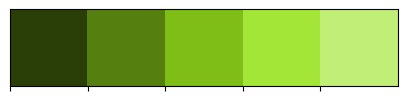

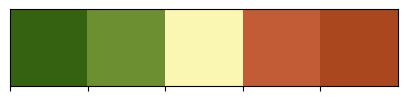

In [435]:
greens = ['#2A3F07', '#557F0F', '#7FBE17', '#A4E637', '#C1EE76']
mixed = ['#356211', '#6C8F32', '#F9F7B2', '#C15C37', '#AA471F']

# Create custom color map
mixed_cmap = LinearSegmentedColormap.from_list("mixed_cmap", mixed)
greens_cmap = LinearSegmentedColormap.from_list("greens_cmap", greens)

sns.palplot(greens)
sns.palplot(mixed)

<style>
    .dark-green {
        background-color: #356211;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
    }
    .styled-hr {
        border: none; 
        border-top: 1px solid white; 
        height: 1px; 
        background-color: white;
    }
</style>

<hr class="styled-hr">

<div class="dark-green">
    <a id="BC"></a>
    <h2><strong>Data Collection and Description</strong></h2>
</div>

<hr class="styled-hr">

Weekly avocado sales and pricing data, collected by the Hass Avocado Board between 2015 and 2023, was used for this project. The data was obtained from Kaggle at this [link](https://www.kaggle.com/datasets/vakhariapujan/avocado-prices-and-sales-volume-2015-2023/data) and is stored in the `Data/Avocado_HassAvocadoBoard_20152023.csv` file. 

The data consists of 12 features and 53.4k observations.
The features are as follows:

* `Date` (datetime): The date of data recording.
* `AveragePrice` (float): The average selling price of a single avocado.
* `TotalVolume` (float): The total number of units sold.
* `plu4046` (float): The number of units of small/medium hass avocados (~3-5oz) sold in the week.
* `plu4225` (float): The number of units of small/medium hass avocados (~8-10oz) sold in the week.
* `plu4770` (float): The number of units of extra large hass avocados (~10-15oz) sold in the week.
* `TotalBags` (float): The total number of bags sold in the week. Bags consist of a variable number of avocados of mixed PLU type.
* `SmallBags` (float): The total number of small bags sold in the week. Bags consist of a variable number of avocados of mixed PLU type.
* `LargeBags` (float): The total number of large bags sold in the week. Bags consist of a variable number of avocados of mixed PLU type.
* `XLargeBags` (float): The total number of extra large bags sold in the week. Bags consist of a variable number of avocados of mixed PLU type.
* `type` (str): The type of avocado (conventional/organic).
* `region` (str): Regions and sub-regions in the US in which the avocados were sold. Total US sales are also included.

<style>
    .dark-green {
        background-color: #356211;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
    }
    .styled-hr {
        border: none; 
        border-top: 1px solid white; 
        height: 1px; 
        background-color: white;
    }
</style>

<hr class="styled-hr">

<div class="dark-green">
    <a id="BC"></a>
    <h2><strong>Data Loading</strong></h2>
</div>

<hr class="styled-hr">

In [436]:
avo_data = pd.read_csv(r'Data/Avocado_HassAvocadoBoard_20152023.csv', sep=',')
avo_data.head(5)

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


<style>
    .dark-green {
        background-color: #356211;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
    }
    .styled-hr {
        border: none; 
        border-top: 1px solid white; 
        height: 1px; 
        background-color: white;
    }
</style>

<hr class="styled-hr">

<div class="dark-green">
    <a id="BC"></a>
    <h2><strong>Data Cleaning and Filtering</strong></h2>
</div>

<hr class="styled-hr">

Remove irrelevant features.

In [437]:
avo_data = avo_data.drop(
    columns=[
        "TotalVolume",
        "TotalBags",
        "SmallBags",
        "LargeBags",
        "XLargeBags"
    ]
)

Remove sub-region and total US data, as we are only interested in using the data on regions.

In [438]:
regions = ['California', 'West', 'Plains', 'SouthCentral', 'Southeast', 'Midsouth', 'GreatLakes', 'Northeast']
avo_data = avo_data[avo_data.region.isin(regions)]

To assist with spotting errors in the data, print summary statistics for the numerical columns.

In [439]:
avo_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,7456.0,1.392206,3.453067e-01,0.619393,1.113242,1.371662,1.649764e+00,2.58
plu4046,7456.0,812777.358403,1.065613e+06,0.000000,12693.922500,125653.515000,1.461486e+06,5160896.68
plu4225,7456.0,590396.359836,8.168833e+05,0.000000,22075.355000,149058.420000,8.772301e+05,5934192.22
plu4770,7456.0,54326.384307,1.168295e+05,0.000000,28.590000,2366.105000,4.084384e+04,1419739.17


Determine if there are any missing values.

In [440]:
avo_data.isnull().sum(axis=0)

Date            0
AveragePrice    0
plu4046         0
plu4225         0
plu4770         0
type            0
region          0
dtype: int64

Verify that the column data types are correct.

In [441]:
avo_data.dtypes

Date             object
AveragePrice    float64
plu4046         float64
plu4225         float64
plu4770         float64
type             object
region           object
dtype: object

Rename the columns in a snake_case format to facilitate ease of analysis.

In [442]:
avo_data = avo_data.rename(
    columns={
        "Date": "date",
        "AveragePrice": "average_unit_price"  
    }
)

Extract year and month data into separate columns. Reformat the date column. 

In [443]:
avo_data['year'] = pd.DatetimeIndex(avo_data['date']).year
avo_data['month'] = pd.DatetimeIndex(avo_data['date']).month
avo_data['date'] = pd.to_datetime(avo_data['date'])

Combine sales data into a single column.

In [444]:
avo_data = avo_data.melt(id_vars=['average_unit_price', 'type', 'region', 'year', 'month', 'date'], value_vars=['plu4046', 'plu4225', 'plu4770'], var_name='plu', value_name='units_sold')

The dataset contains weekly avocado sales data. To simplify analysis of the data, resample the data to get monthly avocado sales. Use the first day of each month to represent the sales data for that month.

In [445]:
avo_data = (
    avo_data.set_index("date")
    .groupby([pd.Grouper(freq="MS"), "year", "month", "type", "region", "plu"])
    .agg({"average_unit_price": "mean", "units_sold": "sum"})
    .reset_index()
)

View cleaned data.

In [446]:
avo_data.head(5)

,date,year,month,type,region,plu,average_unit_price,units_sold
0,2015-01-01,2015,1,conventional,California,plu4046,0.9825,10895054.82
1,2015-01-01,2015,1,conventional,California,plu4225,0.9825,8689709.00
2,2015-01-01,2015,1,conventional,California,plu4770,0.9825,513202.87
3,2015-01-01,2015,1,conventional,GreatLakes,plu4046,1.0825,1676132.87
4,2015-01-01,2015,1,conventional,GreatLakes,plu4225,1.0825,7177685.76


Save the cleaned data to a CSV file.

In [447]:
avo_data.to_csv("Data/Avocado_HassAvocadoBoard_cleaned_20152023.csv")

<style>
    .dark-green {
        background-color: #356211;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
    }
    .styled-hr {
        border: none; 
        border-top: 1px solid white; 
        height: 1px; 
        background-color: white;
    }
</style>

<hr class="styled-hr">

<div class="dark-green">
    <a id="BC"></a>
    <h2><strong>Exploratory Data Analysis</strong></h2>
</div>

<hr class="styled-hr">

<style>
    .wrapper {
        margin: 0 auto; /* Centers the wrapper if needed */
        width: 100%; /* Ensures it takes full width */
    }
    .mid-green {
        background-color: #6C8F32;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
        margin: 2px 0;
    }
</style>

<div class="wrapper">
    <div class="mid-green">
        <a id="BC"></a>
        <h3><strong>Distribution of Categorical Variables</strong></h3>
    </div>
</div>

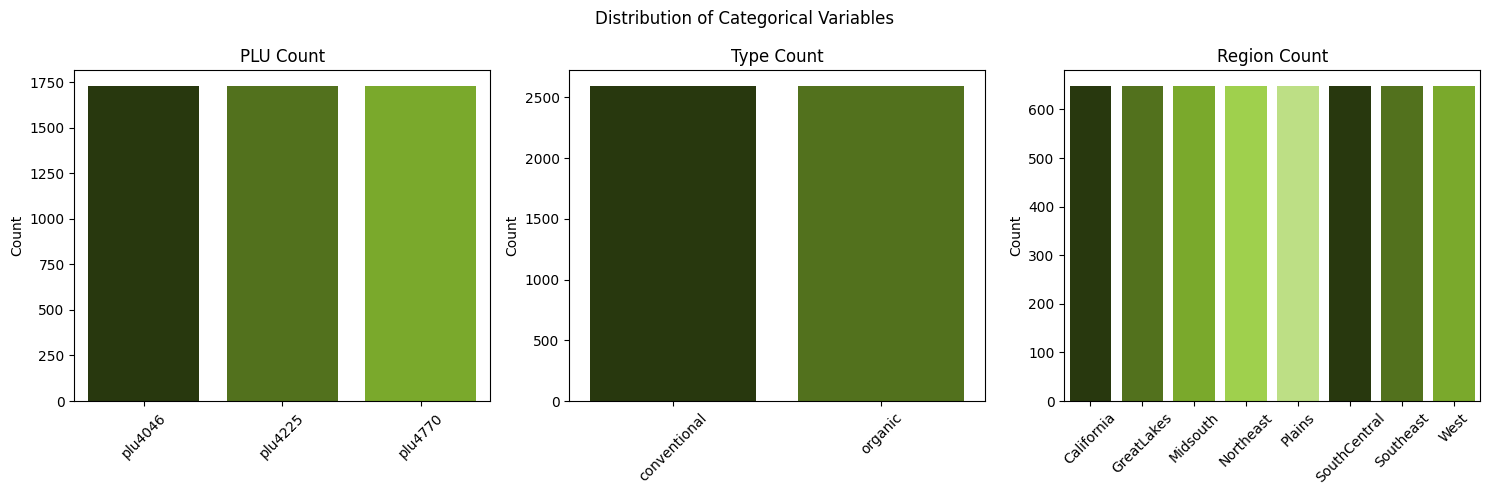

In [448]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution of Categorical Variables')
LinearSegmentedColormap

# Plot categorical variable counts
cat_variables = ['plu', 'type', 'region']
palettes = [greens, ['#6C8F32', '#AA471F'], list(greens_cmap(np.linspace(0,1, 8)))]
titles = ['PLU Count', 'Type Count', 'Region Count']

for i in range(0,3):
    sns.countplot(data=avo_data, x=cat_variables[i], ax=axs[i], hue=cat_variables[i], palette=greens)
    axs[i].set_title(titles[i])
    axs[i].set_xlabel(None)
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

The plots above show balanced distributions of the categorical variables:

* PLU Count: The three PLU codes (plu4046, plu4225, plu4770) have similar counts, of around 1700 observations.
* Type Count: Conventional and organic types are evenly distributed, each with around 2500 counts.
* Region Count: All regions have roughly 600 counts, indicating a uniform distribution of data across regions.

<style>
    .wrapper {
        margin: 0 auto; /* Centers the wrapper if needed */
        width: 100%; /* Ensures it takes full width */
    }
    .mid-green {
        background-color: #6C8F32;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
        margin: 2px 0;
    }
</style>

<div class="wrapper">
    <div class="mid-green">
        <a id="BC"></a>
        <h3><strong>Distribution of Numerical Variables</strong></h3>
    </div>
</div>

Descriptive statistics

In [449]:
avo_data[['average_unit_price', 'units_sold']].describe().T

,count,mean,std,min,25%,50%,75%,max
average_unit_price,5184.0,1.390696e+00,3.372224e-01,0.667986,1.1175,1.375784,1.639900e+00,2.445000e+00
units_sold,5184.0,2.096281e+06,3.623752e+06,0.000000,22439.0475,157666.450000,2.724355e+06,1.951433e+07


Pairplot

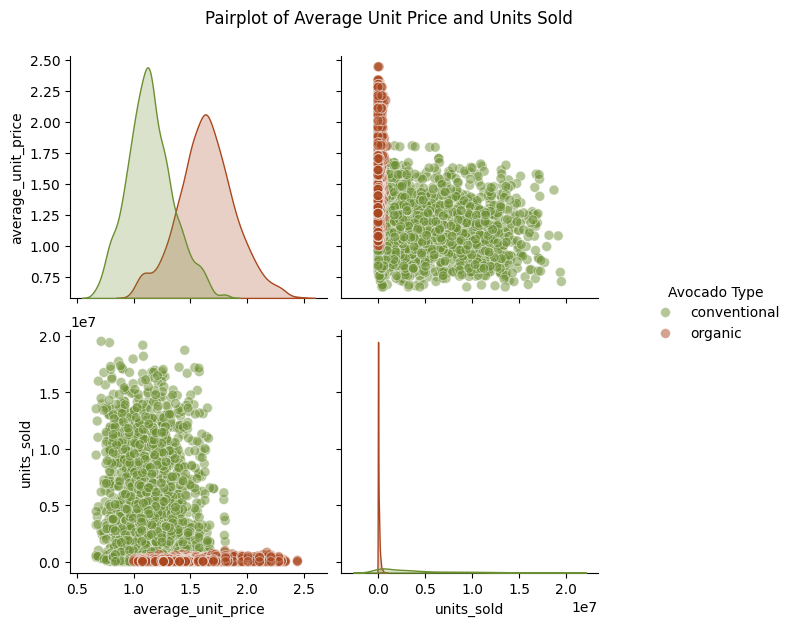

In [465]:
# Create a pairplot
pairplot = sns.pairplot(data=avo_data[['type', 'average_unit_price', 'units_sold']], 
                       plot_kws={'alpha': 0.5, 's': 50, 'edgecolor': 'w'}, hue='type',
                       palette=['#6C8F32', '#AA471F'])

# Set the chart title, axis labels and size
pairplot.fig.suptitle('Pairplot of Average Unit Price and Units Sold', y=1.05)
pairplot._legend.set_title('Avocado Type')
pairplot.fig.set_size_inches(8, 6)

plt.show()

The pairplot visualises the distribution of average unit price and units sold, and the relationship between the two variables, distinguishing between two avocado types: conventional (green) and organic (brown).

The following insights are apparent:

* Organic avocados have a higher average price, mostly ranging between $1.50 and $2.50.
* Conventional avocados are generally cheaper, with prices ranging between $0.75 and $1.50.
* Conventional avocados have a much higher number of units sold compared to organic, with a large number of data points clustered on the lower end of the average unit price.
* Organic avocados have fewer units sold, possibly due to higher prices.

<style>
    .wrapper {
        margin: 0 auto; /* Centers the wrapper if needed */
        width: 100%; /* Ensures it takes full width */
    }
    .mid-green {
        background-color: #6C8F32;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
        margin: 2px 0;
    }
</style>

<div class="wrapper">
    <div class="mid-green">
        <a id="BC"></a>
        <h3><strong>Avocado Variety Sales and Pricing</strong></h3>
    </div>
</div>

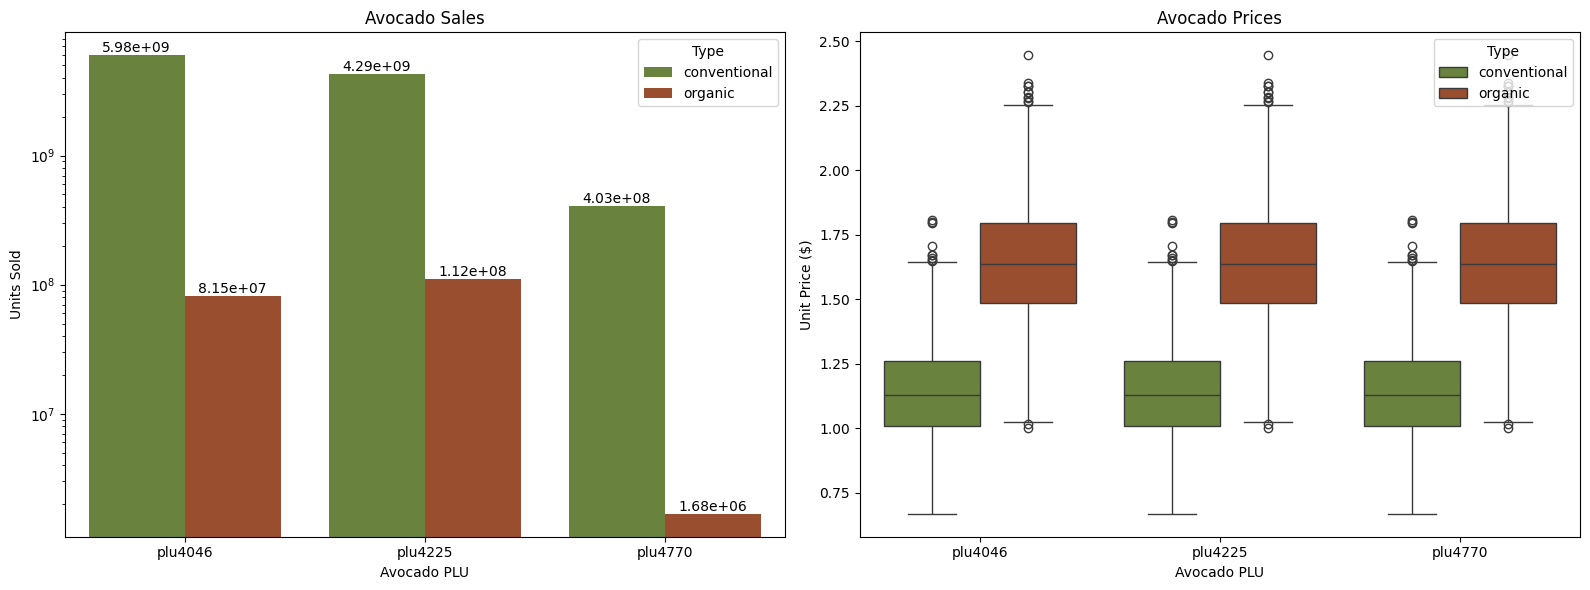

In [466]:
# Calculate sales by type and PLU
sales_data_by_variety = avo_data.groupby(['plu', 'type'])[['units_sold']].sum().reset_index()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Sales by PLU and type
sns.barplot(data=sales_data_by_variety, x='plu', y='units_sold', hue="type", palette=['#6C8F32', '#AA471F'], ax=axs[0])
axs[0].set(title='Avocado Sales', xlabel='Avocado PLU', ylabel='Units Sold')
axs[0].set_yscale('log')
axs[0].legend(title='Type', loc='upper right')

# Add bar labels
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%.2e')

# Plot 2: Prices by PLU and type
sns.boxplot(data=avo_data, x='plu', y='average_unit_price', hue='type', palette=['#6C8F32', '#AA471F'], ax=axs[1])
axs[1].set(title='Avocado Prices', xlabel='Avocado PLU', ylabel='Unit Price ($)')
axs[1].legend(title='Type', loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

The plots above compare sales and pricing for different PLU codes (plu4046, plu4225, plu4770) for both conventional and organic avocados. The insights are as follows:

Sales
* Conventional avocados dominate in terms of units sold across all PLUs.
* The sales volume for plu4046 is the highest for both types, followed by plu4225 and plu4770.
* Organic avocados have significantly lower sales compared to conventional ones, particularly for plu4770.

Prices
* Organic avocados consistently have higher prices than conventional avocados across all PLUs.
* The boxplots show a wider price range for organic avocados, with more variation.
* Conventional avocados show a narrower price range with lower median prices.

<style>
    .wrapper {
        margin: 0 auto; /* Centers the wrapper if needed */
        width: 100%; /* Ensures it takes full width */
    }
    .mid-green {
        background-color: #6C8F32;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
        margin: 2px 0;
    }
</style>

<div class="wrapper">
    <div class="mid-green">
        <a id="BC"></a>
        <h3><strong>Regional Avocado Sales and Pricing</strong></h3>
    </div>
</div>

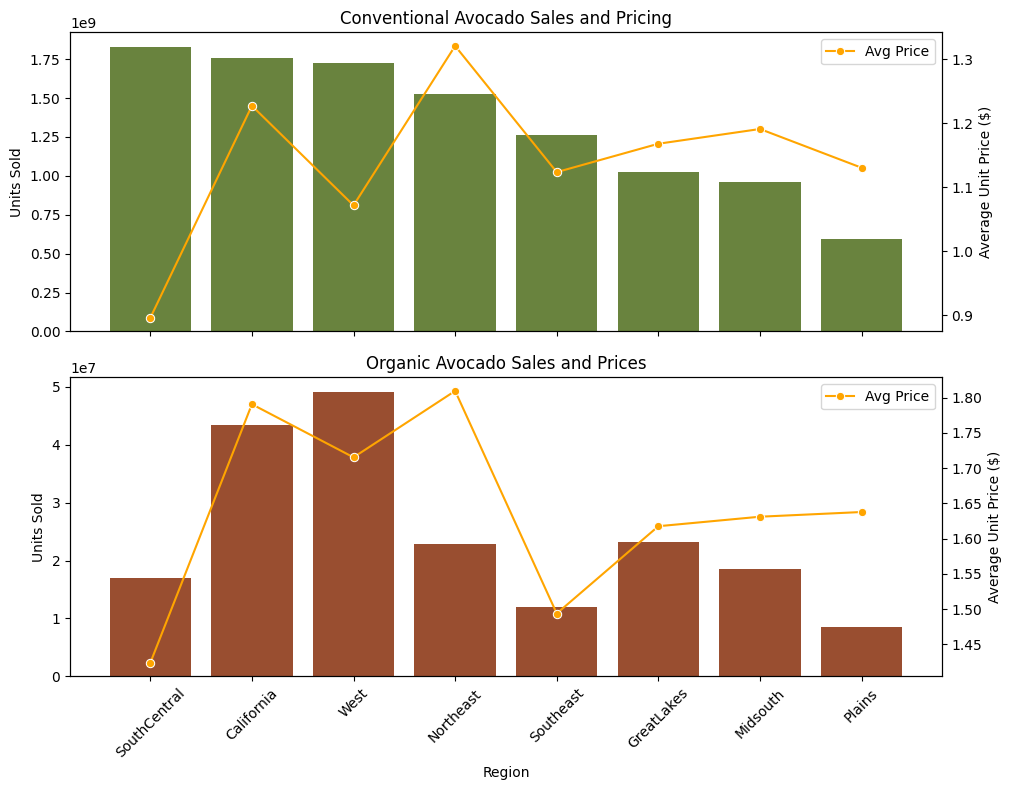

In [452]:
# Calculate sales and average prices for conventional avocados
regional_conv_avo_sales = avo_data[avo_data.type == 'conventional'][['region', 'units_sold']].groupby(['region']).sum().reset_index()
regional_conv_avo_prices = avo_data[avo_data.type == 'conventional'][['region', 'average_unit_price']].groupby('region').mean().reset_index()
regional_conv_avo_sales = regional_conv_avo_sales.sort_values(by='units_sold', ascending=False)
regional_conv_avo_prices = regional_conv_avo_prices.set_index('region').reindex(regional_conv_avo_sales['region']).reset_index()

# Calculate sales and average prices for organic avocados
regional_org_avo_sales = avo_data[avo_data.type == 'organic'][['region', 'units_sold']].groupby(['region']).sum().reset_index()
regional_org_avo_prices = avo_data[avo_data.type == 'organic'][['region', 'average_unit_price']].groupby('region').mean().reset_index()
regional_org_avo_sales = regional_org_avo_sales.sort_values(by='units_sold', ascending=False)
regional_org_avo_prices = regional_org_avo_prices.set_index('region').reindex(regional_org_avo_sales['region']).reset_index()

# Set up the figure and axs
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# Plot for conventional avocados
ax1 = axs[0]
sns.barplot(x='region', y='units_sold', data=regional_conv_avo_sales, ax=ax1, color='#6C8F32', label='Units Sold')
ax2 = ax1.twinx()
sns.lineplot(x='region', y='average_unit_price', data=regional_conv_avo_prices, ax=ax2, marker='o', color='orange', label='Avg Price')
ax1.set_title('Conventional Avocado Sales and Pricing')
ax1.set_xlabel('Region')
ax1.set_ylabel('Units Sold')
ax2.set_ylabel('Average Unit Price ($)')
ax1.tick_params(axis='x', rotation=45)
ax1.get_legend().remove()

# Plot for organic avocados
ax3 = axs[1]
sns.barplot(x='region', y='units_sold', data=regional_org_avo_sales, ax=ax3, color='#AA471F', label='Units Sold')
ax4 = ax3.twinx()
sns.lineplot(x='region', y='average_unit_price', data=regional_org_avo_prices, ax=ax4, marker='o', color='orange', label='Avg Price')
ax3.set_title('Organic Avocado Sales and Prices')
ax3.set_xlabel('Region')
ax3.set_ylabel('Units Sold')
ax4.set_ylabel('Average Unit Price ($)')
ax3.tick_params(axis='x', rotation=45)
ax3.get_legend().remove()

# Adjust layout to increase spacing between subplots
plt.subplots_adjust(hspace=10)  # Adjust hspace to increase vertical spacing

# Display the plot
plt.tight_layout()
plt.show()

This figure displays avocado sales (as bar charts) and average unit prices (as line plots) for conventional and organic avocado types across various regions. The insights are as follows:

**Conventional Avocados**
   - Sales
     - Highest units sold are in regions like *South Central*, *California*, and *West*.
     - Lowest sales are in the *Plains* region.
   - Pricing
     - The average price fluctuates across regions, with the highest in *North East* and the lowest in the *South Central* region.
   - Relationship between Sales and Pricing
     - Pricing seems to be higher in regions with higher sales (with the exception of the South Central region).

**Organic Avocados**
   - Sales
     - Highest units sold are in *California* and the *West* regions.
     - Lowest units sold are in the *Plains* and *Southeast* regions.
   - Pricing
     - The average price fluctuates across regions. The *West* region has the highest prices, while *South Central* has relatively lower prices compared to other regions.
   - Relationship between Sales and Pricing
     - Pricing seems to be higher in regions with higher sales.

**Comparative Summary**
- *Conventional Avocados* have a higher total sales volume compared to *Organic Avocados*, especially in high-population regions like *South Central* and *Northeast*.
- *Organic Avocados* tend to have higher prices, but the total sales are much lower than *Conventional Avocados*.
- The pricing patterns across regions are similar between *Conventional* and *Organic* avocados.

This data suggests that *Conventional Avocados* are more popular in terms of sales volume, but *Organic Avocados* have a niche market with higher pricing, especially in some regions like *West* and *California*.

<style>
    .wrapper {
        margin: 0 auto; /* Centers the wrapper if needed */
        width: 100%; /* Ensures it takes full width */
    }
    .mid-green {
        background-color: #6C8F32;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
        margin: 2px 0;
    }
</style>

<div class="wrapper">
    <div class="mid-green">
        <a id="BC"></a>
        <h3><strong>Annual Avocado Sales and Pricing</strong></h3>
    </div>
</div>


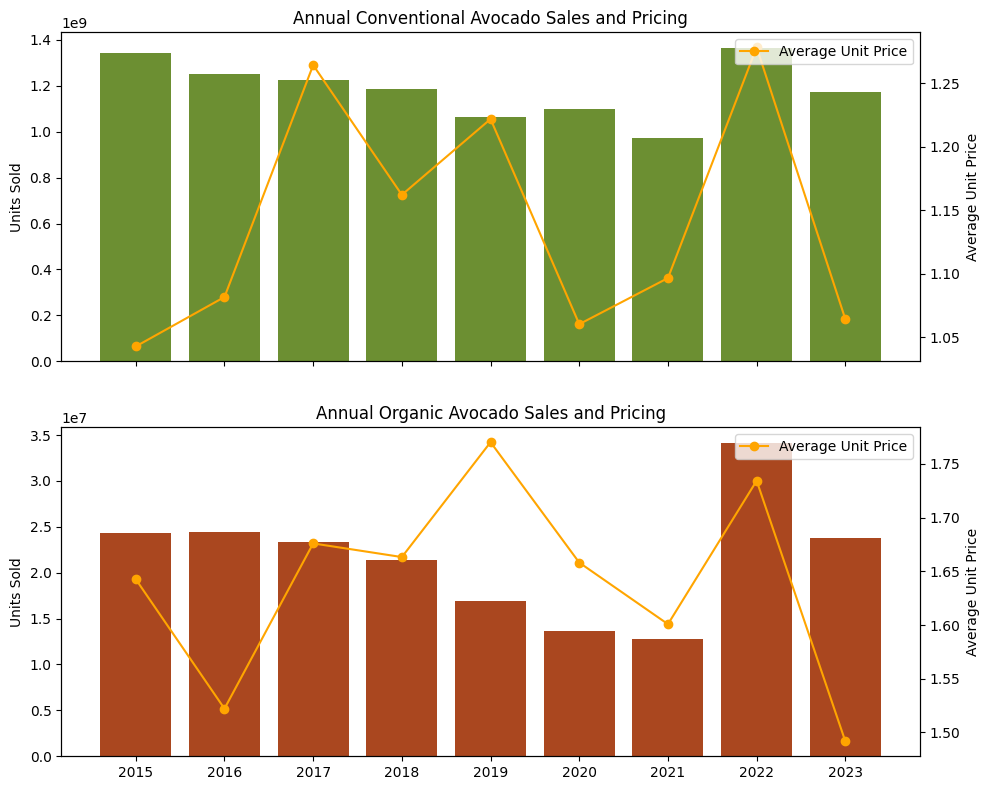

In [453]:
import matplotlib.pyplot as plt

# Calculate the total yearly avocado sales by year and by PLU
annual_conv_avo_sales = avo_data[avo_data.type == 'conventional'][['year', 'units_sold']].groupby('year').sum().reset_index()
annual_conv_avo_prices = avo_data[avo_data.type == 'conventional'][['year', 'average_unit_price']].groupby('year').mean().reset_index().set_index('year')

annual_org_avo_sales = avo_data[avo_data.type == 'organic'][['year', 'units_sold']].groupby('year').sum().reset_index()
annual_org_avo_prices = avo_data[avo_data.type == 'organic'][['year', 'average_unit_price']].groupby('year').mean().reset_index().set_index('year')

# Set up the figure and axs
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True)

# Plot for conventional avocados
ax1 = axs[0]
ax2 = ax1.twinx()
ax1.bar(annual_conv_avo_sales['year'], annual_conv_avo_sales['units_sold'], color='#6C8F32')
ax2.plot(annual_conv_avo_prices, color='orange', marker='o', label='Average Unit Price')
ax1.set_title('Annual Conventional Avocado Sales and Pricing')
ax1.set_ylabel('Units Sold')
ax2.set_ylabel('Average Unit Price')
ax1.set_xticks(annual_conv_avo_sales['year'])
ax2.legend(loc='upper right')

# Plot for organic avocados
ax3 = axs[1]
ax4 = ax3.twinx()
ax3.bar(annual_org_avo_sales['year'], annual_org_avo_sales['units_sold'], color='#AA471F')
ax4.plot(annual_org_avo_prices, color='orange', marker='o', label='Average Unit Price')
ax3.set_title('Annual Organic Avocado Sales and Pricing')
ax3.set_ylabel('Units Sold')
ax4.set_ylabel('Average Unit Price')
ax3.set_xticks(annual_org_avo_sales['year'])
ax4.legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)  # Increase vertical space between plots
plt.show()

This figure shows the annual avocado sales and average unit price trends for conventional and organic avocados from 2015 to 2023. The insights are as follows:

**Conventional Avocados:**
   - Sales Volume:
     - Fairly stable between 2015 and 2023, with a slight dip in 2019 and 2021.
     - A notable increase in 2022 with the highest units sold over the observed period.
   - Price Trends:
     - Prices were highest in 2017 but have been on a downward trend since, with the lowest price recorded in 2023.
     - The drop in price from 2022 to 2023 is significant, despite a high sales volume in 2022.

**Organic Avocados:**
   - Sales Volume:
     - A more varied trend compared to conventional avocados.
     - Lowest sales occurred in 2021, with a significant recovery in 2022.
     - However, sales dropped again in 2023.
   - Price Trends:
     - Price peaks occurred in 2019 and 2022.
     - Similar to conventional avocados, there was a significant price drop in 2023.

**Comparative Summary**
  - Both conventional and organic avocados saw a price peak in 2017 and a notable price drop in 2023. 
  - Both avocado types experienced a rise in sales in 2022, but a sharp drop in price in 2023 for conventional avocados, suggesting potential market saturation or other factors affecting pricing.

<style>
    .wrapper {
        margin: 0 auto; /* Centers the wrapper if needed */
        width: 100%; /* Ensures it takes full width */
    }
    .mid-green {
        background-color: #6C8F32;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
        margin: 2px 0;
    }
</style>

<div class="wrapper">
    <div class="mid-green">
        <a id="BC"></a>
        <h3><strong>Seasonal Sales Trends</strong></h3>
    </div>
</div>

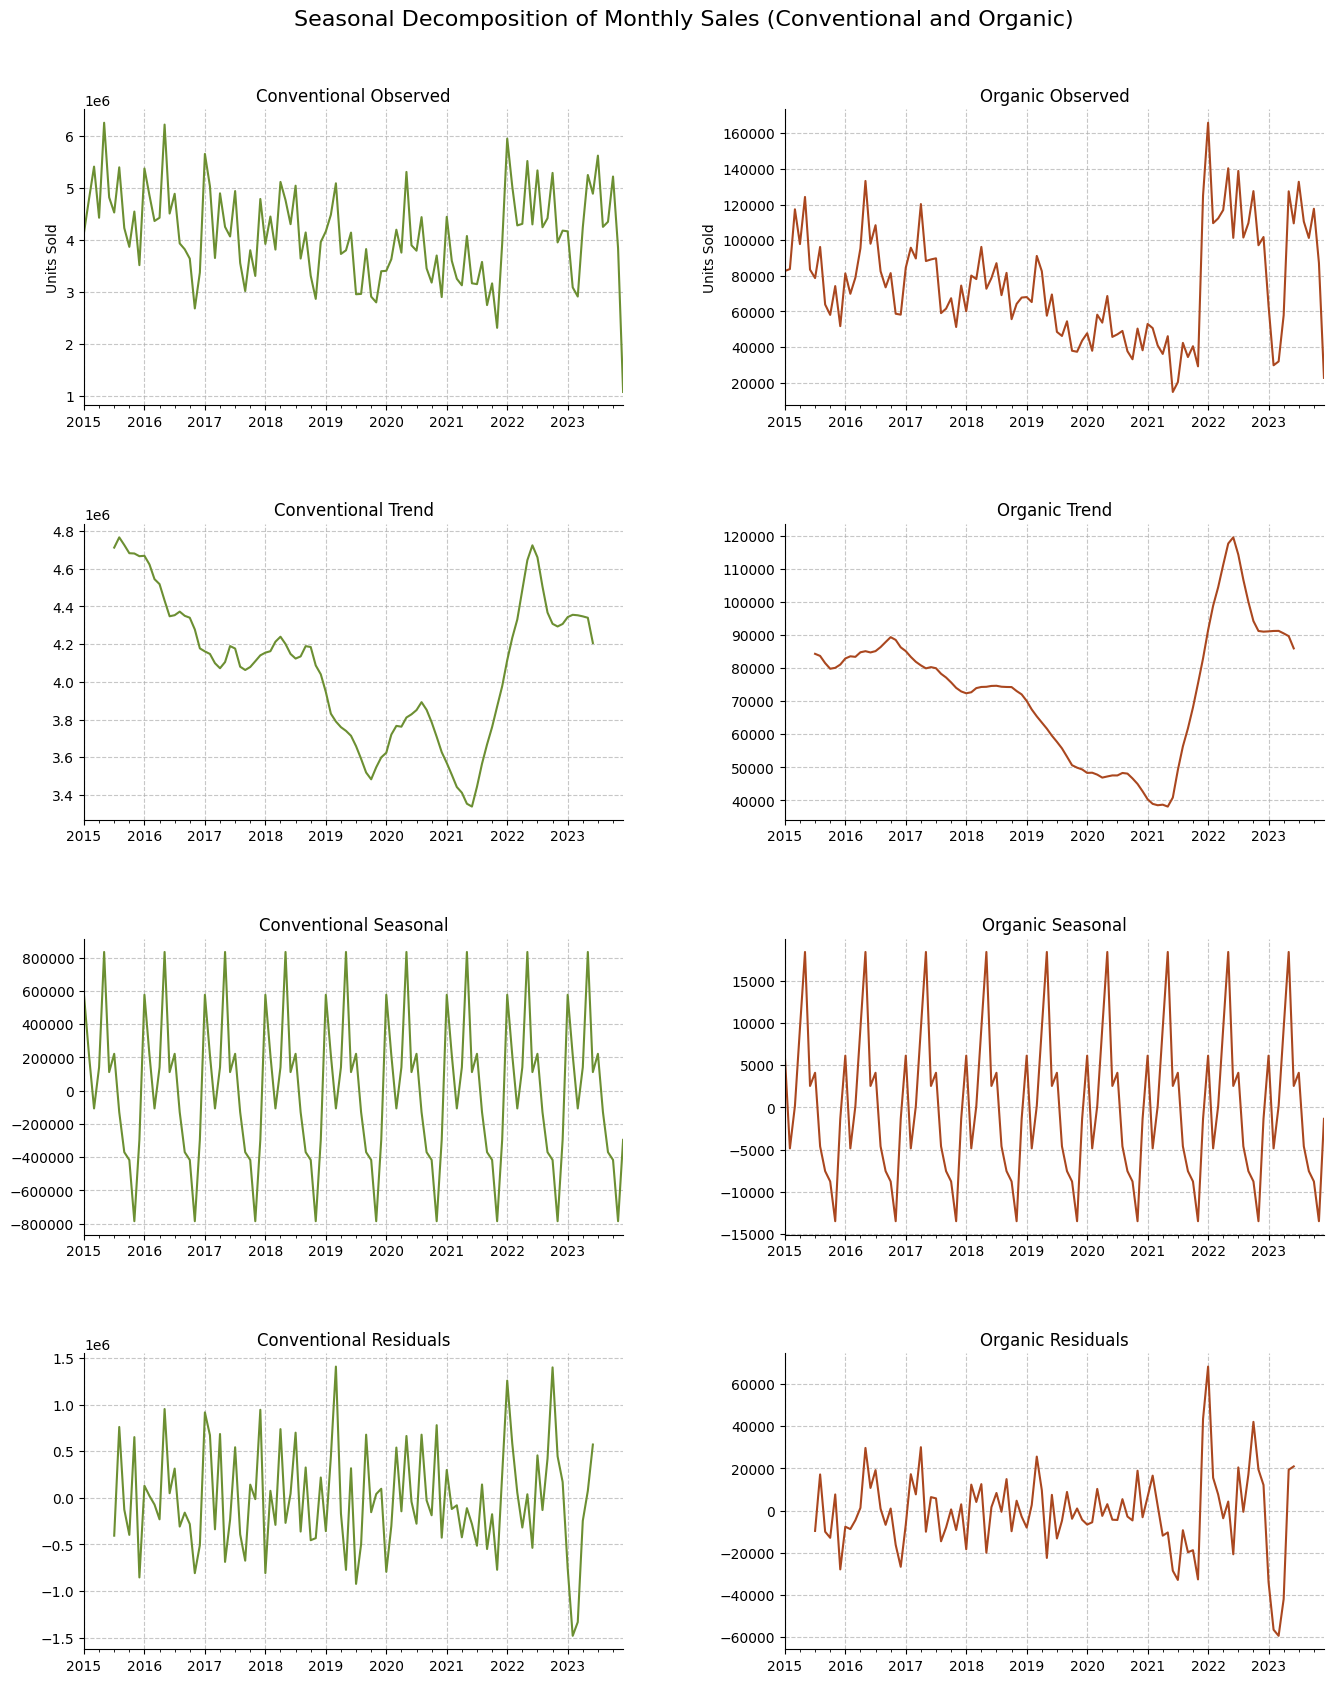

In [454]:
from pylab import rcParams

# Get total monthly sales for conventional and organic avocados
conv_sales_data = avo_data[avo_data.type == 'conventional'][['date', 'units_sold']].groupby('date').mean()
org_sales_data = avo_data[avo_data.type == 'organic'][['date', 'units_sold']].groupby('date').mean()

# Set up the figure size and decompositions
rcParams['figure.figsize'] = 12, 20  # Increase height for 4 rows
conv_decomposition = sm.tsa.seasonal_decompose(conv_sales_data, model='additive')
org_decomposition = sm.tsa.seasonal_decompose(org_sales_data, model='additive')

# Create the figure and subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))  # 4 rows, 2 columns

# Plot for conventional avocados decomposition (trend, seasonal, and residuals)
conv_decomposition.observed.plot(ax=axs[0, 0], title='Conventional Observed', ylabel='Units Sold', color='#6C8F32')
conv_decomposition.trend.plot(ax=axs[1, 0], title='Conventional Trend', color='#6C8F32')
conv_decomposition.seasonal.plot(ax=axs[2, 0], title='Conventional Seasonal', color='#6C8F32')
conv_decomposition.resid.plot(ax=axs[3, 0], title='Conventional Residuals', color='#6C8F32')

# Plot for organic avocados decomposition (trend, seasonal, and residuals)
org_decomposition.observed.plot(ax=axs[0, 1], title='Organic Observed', ylabel='Units Sold', color='#AA471F')
org_decomposition.trend.plot(ax=axs[1, 1], title='Organic Trend', color='#AA471F')
org_decomposition.seasonal.plot(ax=axs[2, 1], title='Organic Seasonal', color='#AA471F')
org_decomposition.resid.plot(ax=axs[3, 1], title='Organic Residuals', color='#AA471F')

# Customize the overall plot
fig.suptitle('Seasonal Decomposition of Monthly Sales (Conventional and Organic)', fontsize=16, y=0.93)  # Adjust title position
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Customizing the individual subplots (remove top and right borders, add grid)
for ax in fig.axes:
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(None)

# Show the plot
plt.show()

This figure illustrates a seasonal decomposition of monthly sales for conventional and organic avocados from 2015 to 2023.

Summary:

**Conventional Avocados:**
- Observed Sales: Show consistent seasonal fluctuations with high sales around mid-year.
- Trend: Overall decreasing trend until 2022 followed by a sharp rise in 2022.
- Seasonality: Clear annual peaks and troughs reflecting strong seasonal patterns.
- Residuals: Larger fluctuations in residuals over time, indicating less predictability or more external influences impacting sales over time.

**Organic Avocados:**
- Observed Sales: Less consistent, with notable spikes and drops.
- Trend: verall decreasing trend until 2022 followed by a sharp rise in 2022.
- Seasonality: Strong and consistent seasonal spikes evident yearly.
- Residuals: Larger fluctuations in residuals over time, indicating less predictability or more external influences impacting sales over time.

This decomposition highlights stronger seasonal patterns in conventional sales compared to organic, with the latter showing more volatility and less predictable trends.

To analyse the correlation between seasonality and sales, include a seasonality feature in the dataset. Use the values from the seasonality plot above.

In [455]:
# Add conventional avocado seasonality trends
conv_avo_data = avo_data[avo_data.type == 'conventional'].merge(right=conv_decomposition.seasonal.reset_index(), on='date')

# Add organic avocado seasonality trends
org_avo_data = avo_data[avo_data.type == 'organic'].merge(right=org_decomposition.seasonal.reset_index(), on='date')

# Concatenate the conventional and organic data into a single dataset
avo_data = pd.concat([conv_avo_data, org_avo_data])

<style>
    .wrapper {
        margin: 0 auto; /* Centers the wrapper if needed */
        width: 100%; /* Ensures it takes full width */
    }
    .mid-green {
        background-color: #6C8F32;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
        margin: 2px 0;
    }
</style>

<div class="wrapper">
    <div class="mid-green">
        <a id="BC"></a>
        <h3><strong>Correlation Between Avocado Sales and Seasonality, Region, Price, and Variety</strong></h3>
    </div>
</div>

To identify factors that have a linear relationship with sales, plot the correlation between units sold and seasonality, region, price, PLU and type. Since region, PLU and type are categorical variables, first use one-hot encoding to create separate binary columns for each category. 

<Axes: >

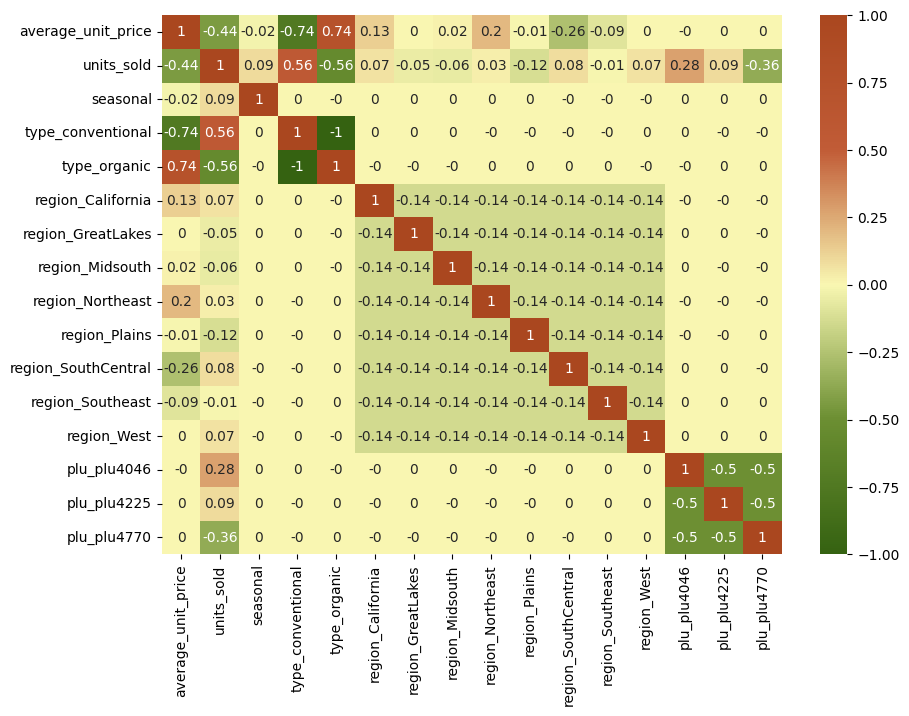

In [456]:
# Use one-hot encoding to convert categorical variables into binary values
corr_data = pd.get_dummies(avo_data.drop(columns=['date', 'year', 'month']), columns=['type', 'region', 'plu'], drop_first=False)

# Calculate the correlation scores between features
correlation_values = round(corr_data.corr(), 2)

# Plot the correlation values
plt.figure(figsize=(10,7))
sns.heatmap(data=correlation_values, annot=True, cmap=mixed_cmap)

From the heatmap above, it is apparent that average unit price, and avocado type and PLU have the highest impact on sales.

<style>
    .dark-green {
        background-color: #356211;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
    }
    .styled-hr {
        border: none; 
        border-top: 1px solid white; 
        height: 1px; 
        background-color: white;
    }
</style>

<hr class="styled-hr">

<div class="dark-green">
    <a id="BC"></a>
    <h2><strong>Modeling</strong></h2>
</div>

<hr class="styled-hr">

In [457]:
#Please use code cells to code in and do not forget to comment your code.

<style>
    .dark-green {
        background-color: #356211;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
    }
    .styled-hr {
        border: none; 
        border-top: 1px solid white; 
        height: 1px; 
        background-color: white;
    }
</style>

<hr class="styled-hr">

<div class="dark-green">
    <a id="BC"></a>
    <h2><strong>Model Evaluation and Validation</strong></h2>
</div>

<hr class="styled-hr">

In [458]:
#Please use code cells to code in and do not forget to comment your code.

<style>
    .dark-green {
        background-color: #356211;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
    }
    .styled-hr {
        border: none; 
        border-top: 1px solid white; 
        height: 1px; 
        background-color: white;
    }
</style>

<hr class="styled-hr">

<div class="dark-green">
    <a id="BC"></a>
    <h2><strong>Final Model</strong></h2>
</div>

<hr class="styled-hr">

In [459]:
#Please use code cells to code in and do not forget to comment your code.

<style>
    .dark-green {
        background-color: #356211;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
    }
    .styled-hr {
        border: none; 
        border-top: 1px solid white; 
        height: 1px; 
        background-color: white;
    }
</style>

<hr class="styled-hr">

<div class="dark-green">
    <a id="BC"></a>
    <h2><strong>Conclusion and Future Work</strong></h2>
</div>

<hr class="styled-hr">

In [460]:
#Please use code cells to code in and do not forget to comment your code.

<style>
    .dark-green {
        background-color: #356211;
        color: white; 
        padding: 3px;
        padding-left: 15px;
        border-radius: 4px;
    }
    .styled-hr {
        border: none; 
        border-top: 1px solid white; 
        height: 1px; 
        background-color: white;
    }
</style>

<hr class="styled-hr">

<div class="dark-green">
    <a id="BC"></a>
    <h2><strong>References</strong></h2>
</div>

<hr class="styled-hr">

In [461]:
#Please use code cells to code in and do not forget to comment your code.